# Line Drawing Algorithns

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


def draw(x, y, size=70, log=False):  # function for grid plotting
    mx, my = max(x), max(y)
    grid_shape = (mx + 1, my + 1)
    grid = np.ones(grid_shape)
    for i, j in zip(x, y):
        grid[i][j] = 0
    if log:  # whether to show np array & transporseor not
        print("after filling\n", grid, "\nafter transpose\n", grid.T)
    plt.figure(figsize=(mx, my / 2), dpi=size)  # now plotting

    plt.subplot(1, 2, 1)
    plt.plot(x, y), plt.scatter(x, y)

    plt.subplot(1, 2, 2), plt.scatter(x, y)
    plt.imshow(grid.T, origin="lower", cmap="grey")
    plt.xlim(min(x) - 1, mx + 1)  # Set x-axis limits for the image plot
    plt.ylim(min(y) - 1, my + 1)

---
## DDA line drawing algo
$y=mx+c$ \
here, $m=\dfrac{y_2-y_1}{x_2-x_1}$

In [2]:
def DAA(x1, x2, y1, y2):
    dy, dx = (y2 - y1), (x2 - x1)
    m = dy / dx
    print(m)  # tangent
    x, y = [x1], [y1]
    if m < 1:
        for i in range(dx):
            x1 += 1
            y1 += m
            x.append(x1)
            y.append(int(y1))
    else:
        for i in range(dy):
            x1 += 1 / m
            y1 += 1
            x.append(int(x1))
            y.append(y1)

    print(x, y, sep="\n")
    return x, y

#### For $m<1,$ $y=y+m$ & $x=x+1$

0.7142857142857143
[3, 4, 5, 6, 7, 8, 9, 10]
[3, 3, 4, 5, 5, 6, 7, 8]
after filling
 [[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0.]] 
after transpose
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]


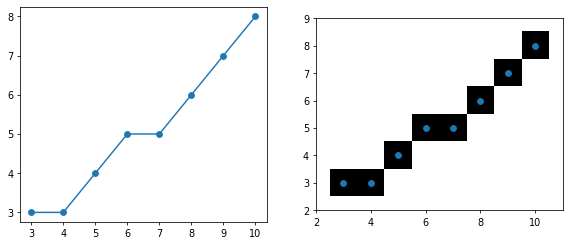

In [3]:
x1, y1 = (3, 3)
x2, y2 = (10, 8)
x, y = DAA(x1, x2, y1, y2)
draw(x, y, log=True)

#### For $m>1$, $y=y+1$ & $x=x+1/m$

1.4285714285714286
[3, 3, 4, 5, 5, 6, 7, 7, 8, 9, 10]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


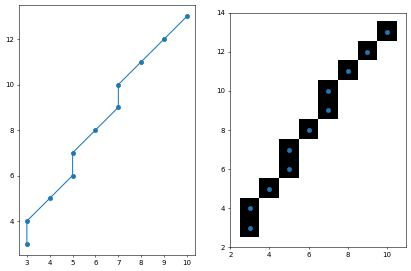

In [4]:
x1, y1 = (3, 3)
x2, y2 = (10, 13)
x, y = DAA(x1, x2, y1, y2)
draw(x, y, size=50)

#### For $m=1$ $y=y+1$ & $x=x+1$ or +m as m=1

1.0
[3, 4, 5, 6, 7, 8, 9, 10]
[3, 4, 5, 6, 7, 8, 9, 10]


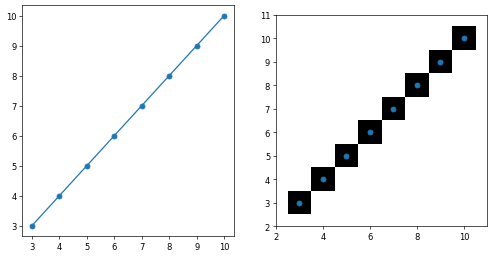

In [5]:
x1, y1 = (3, 3)
x2, y2 = (10, 10)
x, y = DAA(x1, x2, y1, y2)
draw(x, y, size=60)

---
## Bresenham's Line Generation Algorithm

Step-by-Step Algorithm
Here's a more detailed look at the steps of Bresenham's line drawing algorithm:

- Input the two endpoints of the line. Save the left endpoint as $(x_0, y_0)$.
- Plot the first point $(x_0, y_0)$.
- Calculate the constants $dx, dy, 2dy,$ and $(2dy - 2dx)$.
- Calculate the initial decision parameter: $p_0 = 2dy - dx$
- For each $x_k$ along the line, starting with $k = 0$:
     - If $p_k < 0$, plot $(x_k+1, y_k)$ and set $p_k + 1 = p_k + 2dy$
     - Otherwise, plot $(x_k+1, y_k+1)$ and set $p_k+1 = p_k + 2dy - 2dx$
- Repeat step 5 until you reach the end point.

In [6]:
def bresenham(x1, y1, x2, y2):
    dy, dx = y2 - y1, x2 - x1
    m = dy / dx
    print(m)  # tangent

    x, y = [x1], [y1]
    pk = 2 * dy - dx

    if m < 1:
        for i in range(dx):
            if pk < 0:
                pk = pk + 2 * dy
                x1 += 1
            else:
                pk = pk + 2 * dy - 2 * dx
                x1 += 1
                y1 += 1
            x.append(x1)
            y.append(y1)
    else:
        for i in range(dy):
            if pk < 0:
                pk = pk + 2 * dx
                y1 += 1
            else:
                pk = pk + 2 * dx - 2 * dy
                x1 += 1
                y1 += 1
            x.append(x1)
            y.append(y1)
    print(x, y, sep="\n")
    return x, y

#### For $m<1,$ $y=y+m$ & $x=x+1$

0.7142857142857143
[3, 4, 5, 6, 7, 8, 9, 10]
[3, 4, 4, 5, 6, 7, 7, 8]


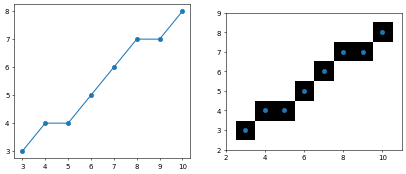

In [7]:
x, y = bresenham(3, 3, 10, 8)
draw(x, y, size=50)

#### For $m>1$, $y=y+1$ & $x=x+1/m$

1.4285714285714286
[3, 4, 5, 6, 6, 7, 8, 8, 9, 10, 10]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


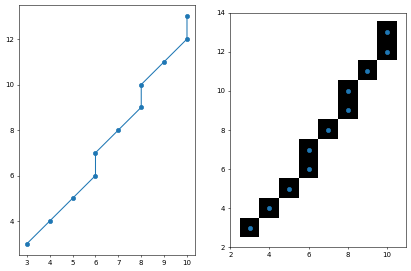

In [8]:
x, y = bresenham(3, 3, 10, 13)
draw(x, y, size=50)

---
## Mid-point Line Generation Algorithm

 first calculate the mid-point $M(x+1, y + \frac{1}{2})$

In [9]:
def midpoint(x1, y1, x2, y2):
    dy, dx = y2 - y1, x2 - x1
    m = dy / dx
    print(m)  # tangent

    x, y = [x1], [y1]
    d = dy - (dx / 2)
    if m < 1:
        for i in range(dx):
            if d < 0:
                d = d + dy
                x1 += 1
            else:
                d = d + dy - dx
                x1 += 1
                y1 += 1
            x.append(x1)
            y.append(y1)
    else:
        for i in range(dy):
            if d < 0:
                d = d + dx
                y1 += 1
            else:
                d = d + dx - dy
                x1 += 1
                y1 += 1
            x.append(x1)
            y.append(y1)
    print(x, y, sep="\n")
    return x, y

#### For $m<1,$ $y=y+m$ & $x=x+1$

0.7142857142857143
[3, 4, 5, 6, 7, 8, 9, 10]
[3, 4, 4, 5, 6, 7, 7, 8]


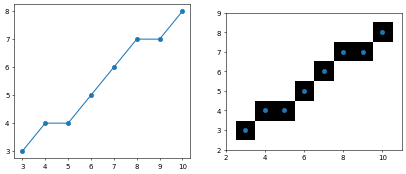

In [10]:
x, y = midpoint(3, 3, 10, 8)
draw(x, y, size=50)

#### For $m>1$, $y=y+1$ & $x=x+1/m$

1.4285714285714286
[3, 4, 5, 6, 6, 7, 8, 8, 9, 10, 10]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


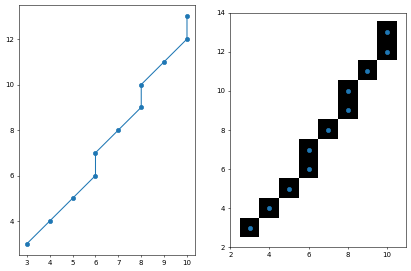

In [11]:
x, y = midpoint(3, 3, 10, 13)
draw(x, y, size=50)